In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision.transforms as transforms

In [2]:
# 加载图片
img_path='Apple.jpg'
img=Image.open(img_path)

#应用转换操作
# 定义转换操作(相当于一个函数，对传过来的值进行下列的一系列操作)
transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor()#会进行类似标准化的处理，数据类型变为float型 且 范围变为[0,1]
])
img_tensor=transform(img)
print(img_tensor.shape)

torch.Size([3, 256, 256])


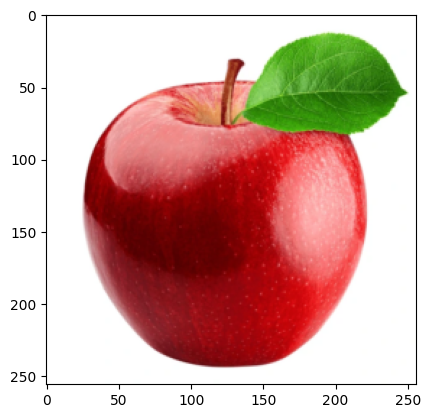

In [5]:
img_ndarray=img_tensor.permute(1,2,0).numpy()
plt.imshow(img_ndarray)
plt.show()

In [7]:
import torch
import torch.nn as nn

In [10]:
#自定义类
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder=nn.Sequential(
            #第一层卷积
            nn.Conv2d(3,16,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            #第二层卷积
            nn.Conv2d(16,8,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
        )
        self.decoder=nn.Sequential(
            nn.ConvTranspose2d(8,16,kernel_size=3,stride=2,padding=1,output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16,3,kernel_size=3,stride=2,padding=1,output_padding=1),
            nn.Sigmoid()
        )
    def forward(self,x):
        x=self.encoder(x)
        # print(x.shape)
        x=self.decoder(x)
        # print(x.shape)
        return x
model=AutoEncoder()
#测试前向传播
x=model(torch.randn(1,3,256,256))
print(x.shape)

torch.Size([1, 3, 256, 256])


In [12]:
#训练模型
#定义损失函数和优化器
loss=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)
#训练
epochs_num=400
for epoch in range(epochs_num):
    output=model(img_tensor) #前向传播
    loss_value=loss(output,img_tensor) #计算损失
    #反向传播和优化
    loss_value.backward()
    optimizer.step()
    optimizer.zero_grad()
    #打印损失
    if (epoch+1)%10==0:
        print(f'Epoch [{epoch+1}/{epochs_num}], Loss: {loss_value.item():.4f}')


Epoch [10/400], Loss: 0.0098
Epoch [20/400], Loss: 0.0093
Epoch [30/400], Loss: 0.0089
Epoch [40/400], Loss: 0.0084
Epoch [50/400], Loss: 0.0080
Epoch [60/400], Loss: 0.0076
Epoch [70/400], Loss: 0.0071
Epoch [80/400], Loss: 0.0067
Epoch [90/400], Loss: 0.0062
Epoch [100/400], Loss: 0.0058
Epoch [110/400], Loss: 0.0053
Epoch [120/400], Loss: 0.0049
Epoch [130/400], Loss: 0.0045
Epoch [140/400], Loss: 0.0042
Epoch [150/400], Loss: 0.0039
Epoch [160/400], Loss: 0.0036
Epoch [170/400], Loss: 0.0034
Epoch [180/400], Loss: 0.0032
Epoch [190/400], Loss: 0.0030
Epoch [200/400], Loss: 0.0029
Epoch [210/400], Loss: 0.0028
Epoch [220/400], Loss: 0.0027
Epoch [230/400], Loss: 0.0026
Epoch [240/400], Loss: 0.0026
Epoch [250/400], Loss: 0.0025
Epoch [260/400], Loss: 0.0025
Epoch [270/400], Loss: 0.0024
Epoch [280/400], Loss: 0.0024
Epoch [290/400], Loss: 0.0023
Epoch [300/400], Loss: 0.0023
Epoch [310/400], Loss: 0.0023
Epoch [320/400], Loss: 0.0022
Epoch [330/400], Loss: 0.0022
Epoch [340/400], Lo

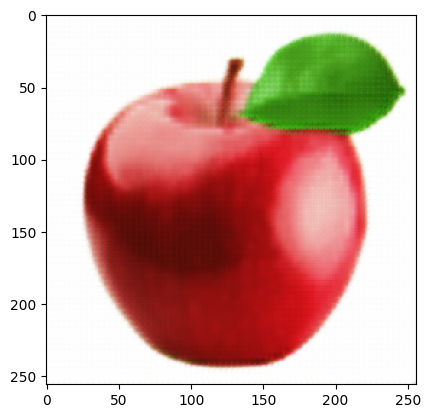

In [13]:
#重构图像
output=model(img_tensor)
output_ndarray=output.permute(1,2,0).detach().numpy()
plt.imshow(output_ndarray)
plt.show()
